In [1]:
import data_utils

dataset = data_utils.get_dataset()
dataset = data_utils.clean_riesgo_vida(dataset)
dataset = dataset.drop(['PQR_ESTADO'], axis = 1)

dataset.head()

/Users/mrugeles/Documents/DataScience/Supersalud-PQRSD/data_utils.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataset['RIESGO_VIDA'] = np.where(dataset['RIESGO_VIDA'] == 'si', 1,0)


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_DPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_GRUPOALERTA,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,bogota d.c.,bogotá,juridica,escrito,pqr,0,peticion directa,reclamo,0,trim i
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,nariño,puerres,natural,telefonico,pqr,0,0,reclamo,0,trim i
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,valle,cali,natural,telefonico,pqr,0,0,reclamo,0,trim i
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,huila,neiva,natural,personalizado,pqr,0,0,reclamo,0,trim i
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,risaralda,dosquebradas,natural,personalizado,pqr,0,0,reclamo,1,trim i


In [2]:

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for column in dataset.columns:
    le.fit(dataset[column])
    dataset[column] = le.transform(dataset[column]) 

dataset.head()

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_DPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_GRUPOALERTA,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,7,2,1,2,5,125,12,4,5,2,...,7,124,1,2,0,0,3,3,0,0
1,24,1,1,1,5,817,12,4,5,2,...,24,813,2,4,0,0,0,3,0,0
2,34,2,5,1,5,166,1,4,1,2,...,34,165,2,4,0,0,0,3,0,0
3,20,2,8,1,5,707,13,4,1,2,...,20,702,2,3,0,0,0,3,0,0
4,28,2,1,1,5,333,13,5,1,2,...,28,331,2,3,0,0,0,3,1,0


In [3]:
set(dataset['RIESGO_VIDA'].values)

{0, 1}

0    1841972
1     288811
Name: RIESGO_VIDA, dtype: int64


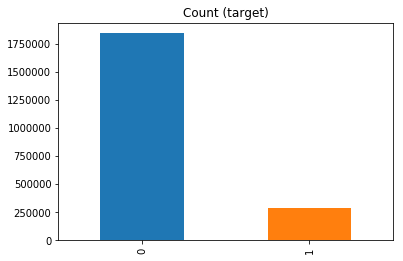

In [4]:
target_count = dataset['RIESGO_VIDA'].value_counts()
print(target_count)
target_count.plot(kind='bar', title='Count (target)');

## Store processed dataset

In [5]:
dataset.to_csv("datasets/naive_dataset.csv", index = False)